created by Dirk Derichsweiler, June 2023
# Importing a third-party applications using HPE Ezmeral Unified Analytics Software

This chapter will delve into the process of importing third-party applications using HPE Ezmeral Unified Analytics Software Platform.


<div class="alert alert-block alert-success">
<b>INFO</b> You will find all necessary files under folder ./import_application, i highly recommend to Download them all to your demo machine.
</div>

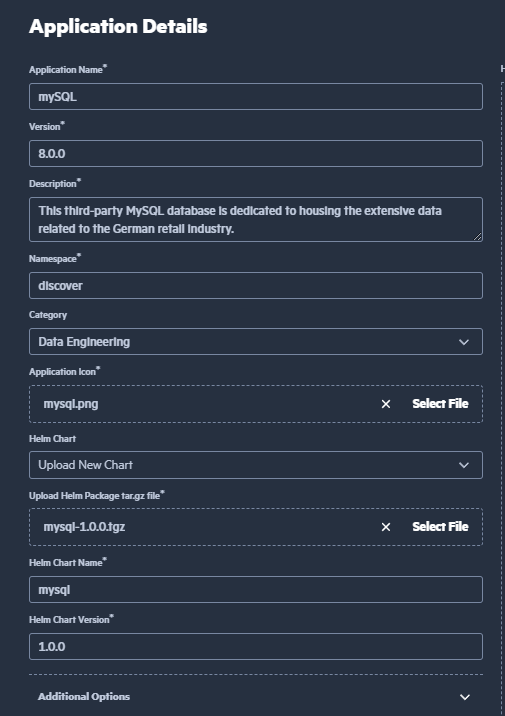


MySQL  
8.0.33  
This third-party MySQL database is dedicated to housing the extensive data related to the German retail Industry.  
Namespace: discover

# show mysql charts

In [10]:
import requests

url = "http://chartmuseum.ez-chartmuseum-ns.svc.cluster.local:8080/api/charts"

response = requests.get(url)

if response.status_code == 200:
    # Request was successful
    data = response.json()
    print(data)
else:
    # Request encountered an error
    print("Request failed with status code:", response.status_code)

{'NM Test App': [{'name': 'NM Test App', 'version': '1.0.4', 'description': 'Test app', 'apiVersion': 'v2', 'type': 'application', 'urls': ['charts/NM Test App-1.0.4.tgz'], 'created': '2023-05-26T21:27:20.254369381Z', 'digest': 'fd4a144337230d5f9506bd1cb36e43a3ada50c51abf5a3f3bc95a872b8d4f0c8'}], 'airflow': [{'name': 'airflow', 'home': 'https://github.hpe.com/hpe/ezaf/tree/release/fy23-q2/apps/airflow', 'sources': ['https://github.hpe.com/hpe/ezaf/tree/release/fy23-q2/apps/airflow'], 'version': '1.0.1', 'description': 'Hewlett Packard Enterprise Airflow Helm.', 'keywords': ['airflow'], 'icon': 'https://cwiki.apache.org/confluence/download/attachments/145723561/airflow_transparent.png', 'apiVersion': 'v2', 'appVersion': '2.5.1-ezaf-fy23-q2-rc3', 'urls': ['charts/airflow-1.0.1.tgz'], 'created': '2023-05-09T13:37:44.145654196Z', 'digest': '4e4b560870dc44d9b44a6ad19d4b1aff2d87dc5ef5bff32693bc791f43c411d0'}, {'name': 'airflow', 'home': 'https://github.hpe.com/hpe/ezaf/tree/release/fy23-q2/a

# delete mysql versions - except newest one

In [9]:
import requests

def extract_versions(url):
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        versions = []
        for chart in data:
            version_info = {
                'name': chart['name'],
                'version': chart['version'],
                'description': chart['description'],
                'apiVersion': chart['apiVersion'],
                'appVersion': chart['appVersion'],
                'type': chart['type'],
                'urls': chart['urls'],
                'created': chart['created'],
                'digest': chart['digest']
            }
            versions.append(version_info)

        return versions
    else:
        print("Request failed with status code:", response.status_code)
        return None


def delete_versions(url, versions):
    newest_version = max(versions, key=lambda v: v['created'])

    for version in versions:
        if version != newest_version:
            delete_url = url.format(version=version['version'])
            response = requests.request('DELETE', delete_url)
            if response.status_code == 200:
                print(f"Chart version '{version['version']}' deleted successfully.")
            else:
                print(f"Failed to delete chart version '{version['version']}' with status code:", response.status_code)

extract_url = "http://chartmuseum.ez-chartmuseum-ns.svc.cluster.local:8080/api/charts/mysql"
url = "http://chartmuseum.ez-chartmuseum-ns.svc.cluster.local:8080/api/charts/mysql/{version}"
chart_versions = extract_versions(extract_url)


if chart_versions:
    delete_versions(url, chart_versions)


# delete all mysql chart files

In [17]:
import requests

def extract_versions(url):
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        versions = []
        for chart in data:
            version_info = {
                'name': chart['name'],
                'version': chart['version'],
                'description': chart['description'],
                'apiVersion': chart['apiVersion'],
                'appVersion': chart['appVersion'],
                'type': chart['type'],
                'urls': chart['urls'],
                'created': chart['created'],
                'digest': chart['digest']
            }
            versions.append(version_info)

        return versions
    else:
        print("Request failed with status code:", response.status_code)
        return None


def delete_versions(url, versions):
    newest_version = max(versions, key=lambda v: v['created'])

    for version in versions:
        delete_url = url.format(version=version['version'])
        response = requests.request('DELETE', delete_url)
        if response.status_code == 200:
            print(f"Chart version '{version['version']}' deleted successfully.")
        else:
            print(f"Failed to delete chart version '{version['version']}' with status code:", response.status_code)

extract_url = "http://chartmuseum.ez-chartmuseum-ns.svc.cluster.local:8080/api/charts/mysql"
url = "http://chartmuseum.ez-chartmuseum-ns.svc.cluster.local:8080/api/charts/mysql/{version}"
chart_versions = extract_versions(extract_url)


if chart_versions:
    delete_versions(url, chart_versions)


Request failed with status code: 404


In [ ]:
MySQL
8.0.33
This third-party MySQL database is dedicated to housing the extensive data related to the German retail Industry.

In [ ]:
Retail-Demo-2023
end2end retail founder: Dirk Derichsweiler, Contributors: Isabel Steinhauer, Vincent


# Video

In [20]:
%%HTML
<video width="1024" height="768" controls>
  <source src="../videos/2-fast.mp4" type="video/mp4">
</video>

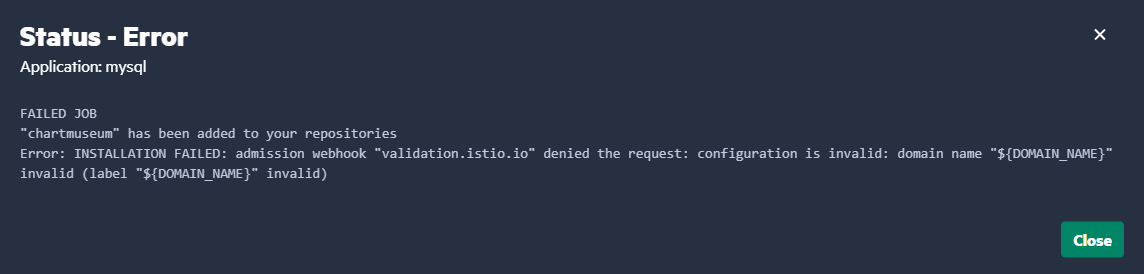